# Импорт библиотек

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Расчет параметров эксплуатации газопровода

## Исходные данные

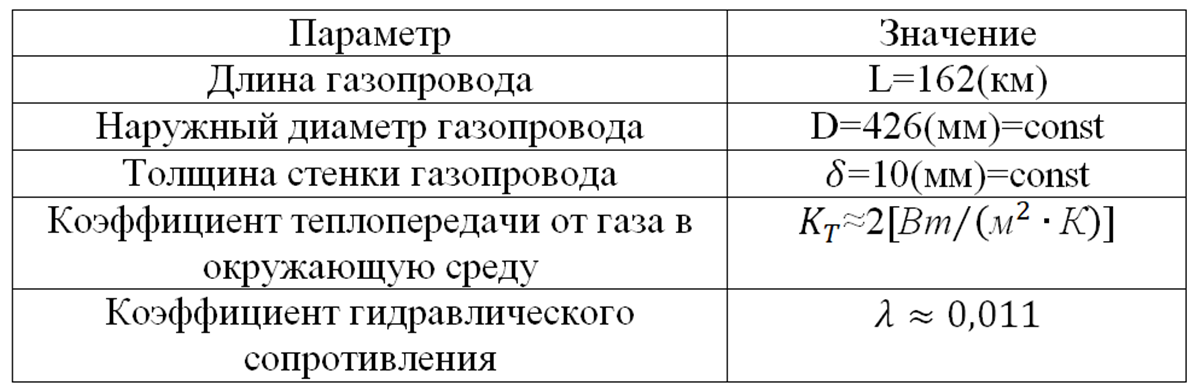

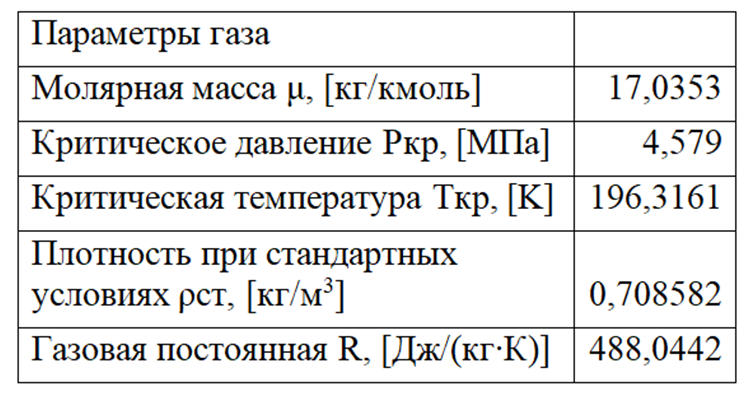

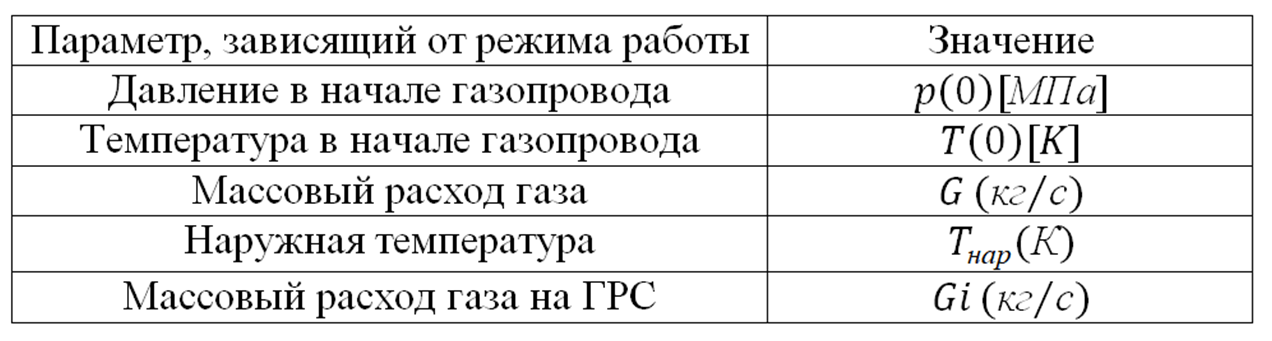

In [3]:
D = 0.426
sigma = 0.01
L = 162*1000
mu = 17.0353
P_crit = 4.579*1000000
T_crit = 196.3161
Kt = 2
T_nar = (5)+273
lamda = 0.01
P0 = 5.4*1000000
Cv = 2000
G = 5.6688
T0 = 9+273
g = 9.81
ro_stan = 0.7086

R = 8314/mu
d = D-2*sigma
S = (np.pi*d**2)/4

## Расход газа по длине газпоровода с учетом потребления ГРС

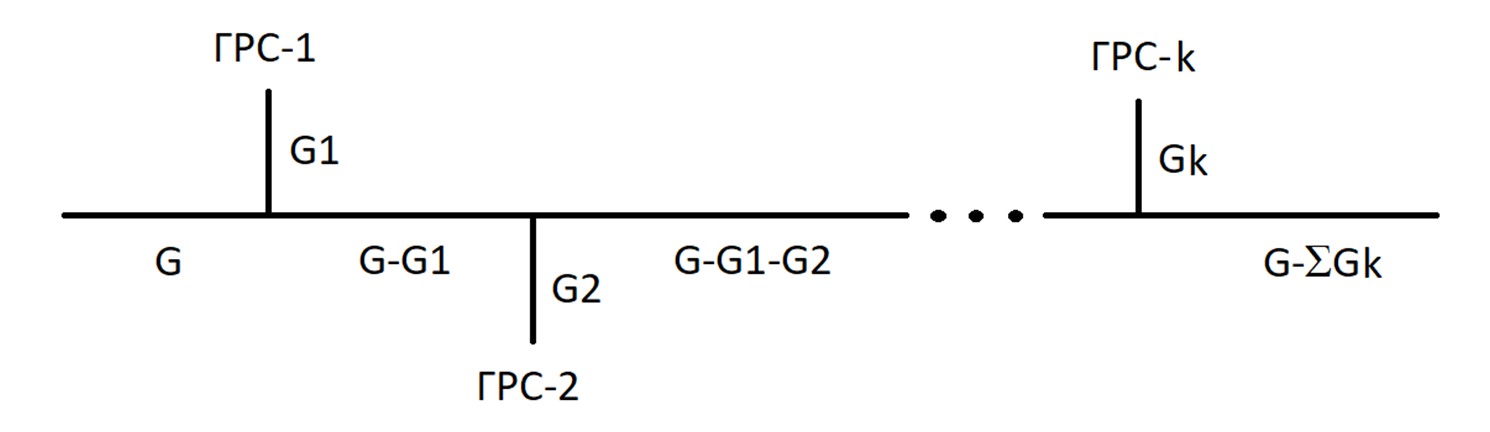

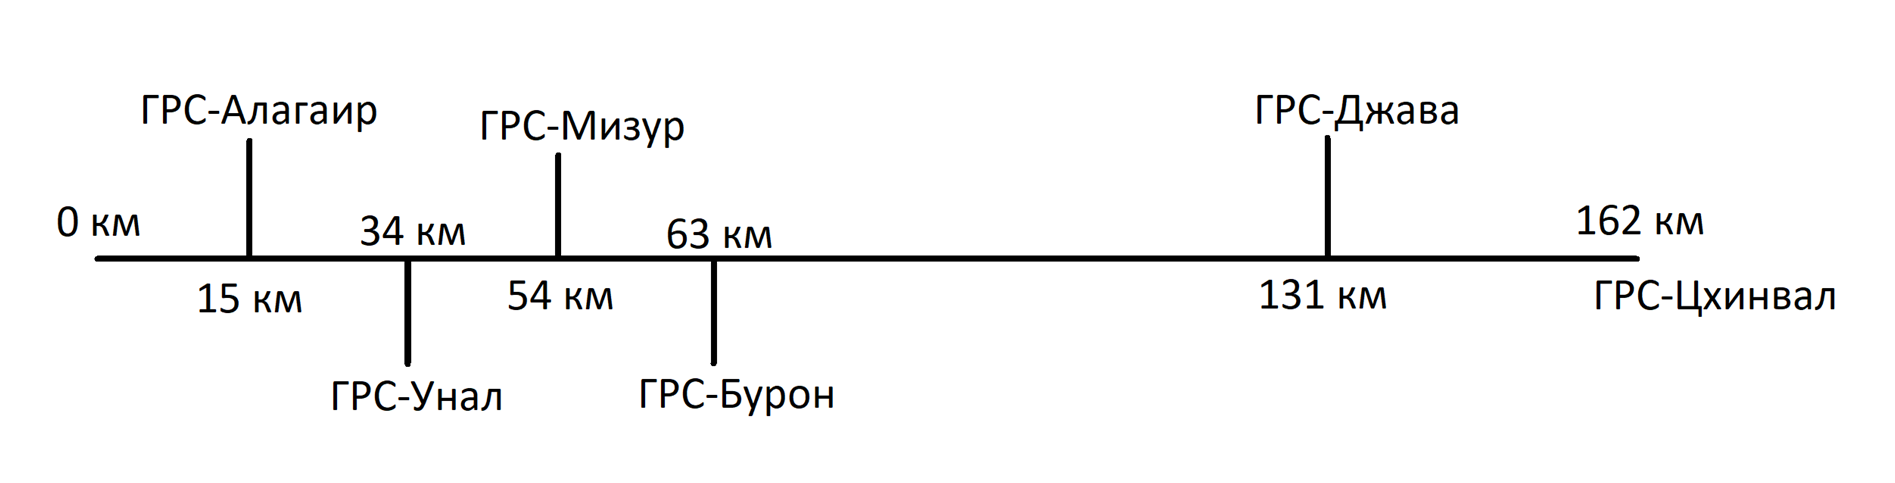

In [4]:
G_general = 5.6688
G_GDS = [2.919432, 0.2324208, 0.12017856,  0.04478352, 0.07993008]
x_GDS = [0, 15, 34, 54, 63, 131, 162]

G_list = list()
G_list.append(G_general)
for i in range(len(G_GDS)):
    G_i = G_list[i] - G_GDS[i]
    G_list.append(G_i)

x_j1 = [15, 15]  
x_j2 = [34, 34] 
x_j3 = [54, 54] 
x_j4 = [63, 63]
x_j5 = [131, 131]
x_j6 = [162, 162]

h_j1 = [0, 602]
h_j2 = [0, 917]
h_j3 = [0, 1355]
h_j4 = [0, 1378]
h_j5 = [0, 1411]
h_j6 = [0, 931]

p_j1 = [4.3, 5.45]
p_j2 = [4.3, 5.45]
p_j3 = [4.3, 5.45]
p_j4 = [4.3, 5.45]
p_j5 = [4.3, 5.45]
p_j6 = [4.3, 5.45]

t_j1 = [276, 282]
t_j2 = [276, 282]
t_j3 = [276, 282]
t_j4 = [276, 282]
t_j5 = [276, 282]
t_j6 = [276, 282]

g_j1 = [2.2, 5.7]
g_j2 = [2.2, 5.7]
g_j3 = [2.2, 5.7]
g_j4 = [2.2, 5.7]
g_j5 = [2.2, 5.7]
g_j6 = [2.2, 5.7]

## Профиль трассы

In [5]:
x = [0, 3, 5, 7, 11, 14, 16, 19, 21, 25, 28, 30, 33, 36, 39, 42, 46, 49, 51, 54, 57, 59, 62, 65, 68, 70, 72, 76, 79, 81, 83, 85, 87, 89, 90, 92, 94, 96, 98, 100, 102, 105, 107, 109, 112, 115, 117, 119, 121, 123, 125, 126, 129, 131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155, 157, 159, 162]
h = [610, 635, 630, 598, 578, 570, 620, 682, 675, 711, 1110, 1280, 800, 1120, 1332, 1260, 1650, 1500, 1270, 1350, 1450, 1280, 1350, 1420, 1380, 1510, 1620, 1780, 1810, 1900, 2050, 2200, 2380, 2620, 2850, 3140, 2780, 2300, 2100, 1950, 1760, 1580, 1770, 1820, 1850, 1720, 1700, 1815, 1750, 1610, 1700, 1750, 1560, 1410, 1290, 1650, 1510, 1900, 1720, 1840, 1820, 1750, 1600, 1450, 1340, 1240, 1320, 1100, 920]

## Разделим расчетную область т/п на "n" участков с шагом "delta_x"

In [7]:
n = 162
delta_x = L/n

## Решение системы ДУ

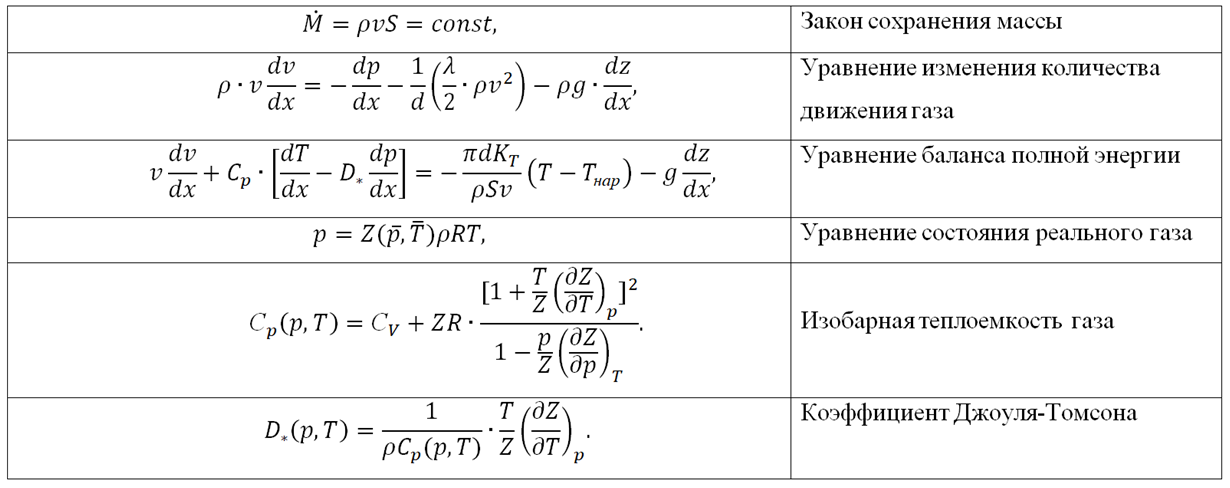

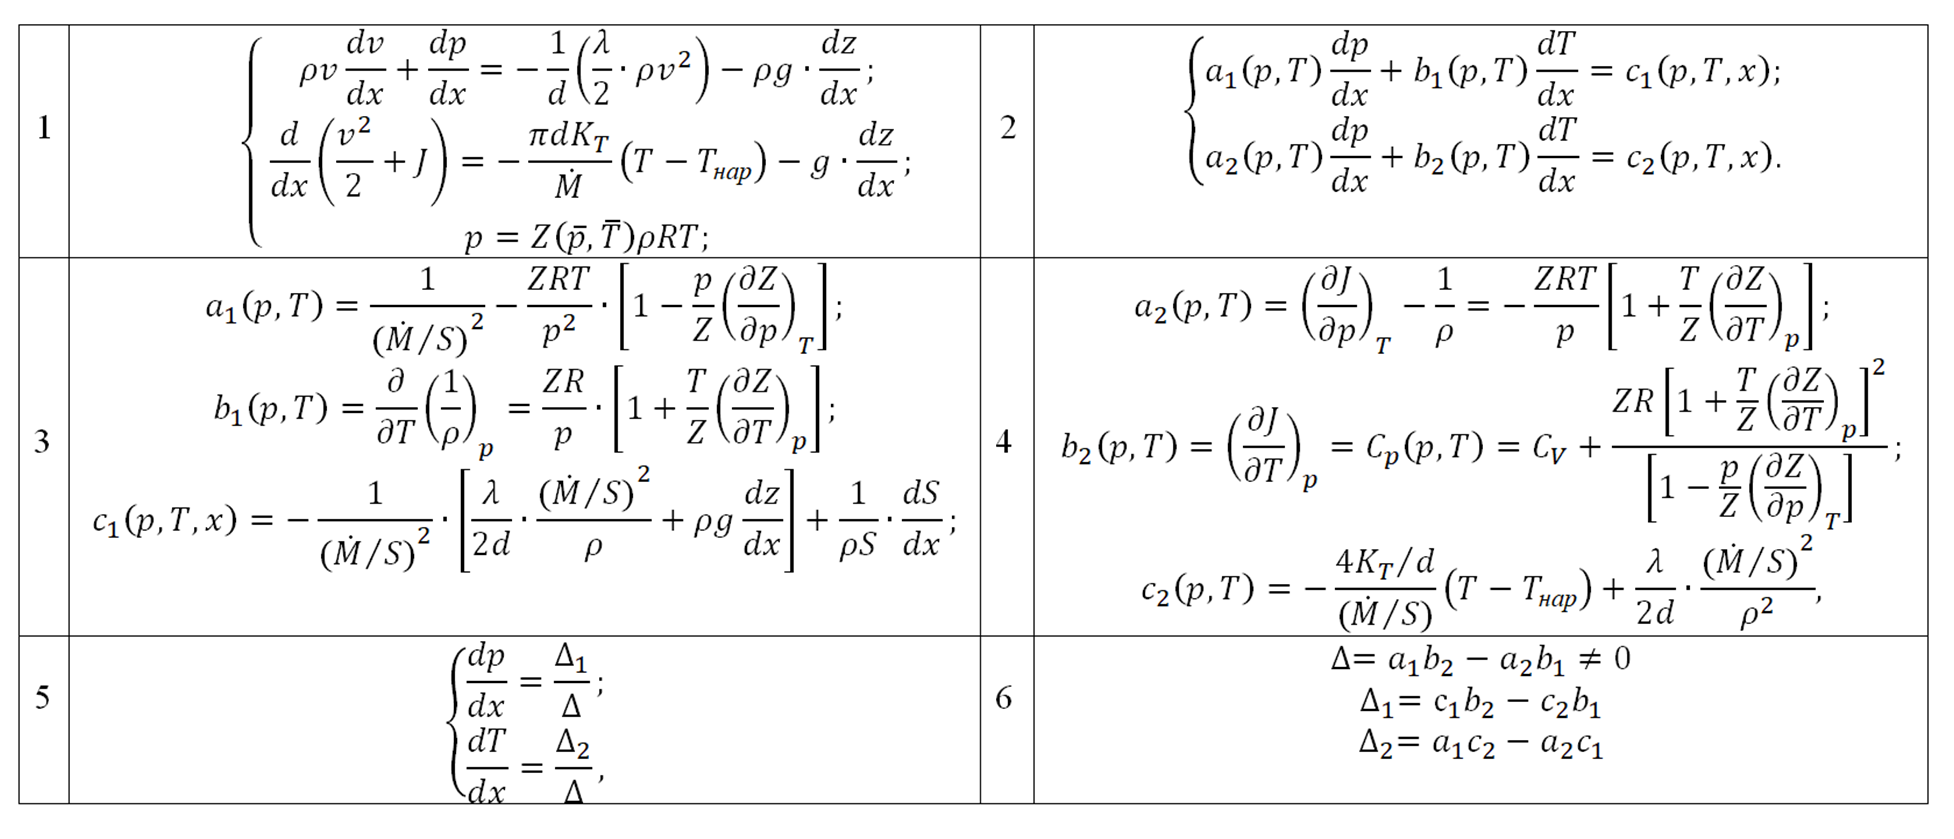

In [8]:
P = P0
T = T0
P_list = list()
T_list = list()
delta_x_list = list()
dz_dx_list = list()
G_list_1 = list()

P_list.append(P/1000000)
T_list.append(T)
delta_x_list.append(0)
dz_dx_list.append(0) 
G_list_1.append(G_general)

for j in range(n):
    delta_x_list.append(delta_x/1000)

    for i in range(len(x)-1):
        if x[i] < (delta_x/1000) <= x[i+1]:
            dz_dx = (h[i+1]-h[i])/(x[i+1]-x[i])/1000
    dz_dx_list.append(dz_dx)

    for i in range(len(G_list)):
        if x_GDS[i] <= (delta_x/1000) < x_GDS[i+1]:
            G = G_list[i]                      
    G_list_1.append(G)

    z = 1-0.4273*(P/P_crit)*(T/T_crit)**(-3.668)
    ro = P/(z*R*T)

    dz_dp_t = -(0.4273/P_crit)*(T/T_crit)**(-3.668)
    dz_dt_p = 0.4273*3.668*(P/P_crit)*(T**(-4.668)/T_crit**(-3.668))

    a1 = (1/(G/S)**2)-(z*R*T/P**2)*(1-(P/z)*dz_dp_t)
    b1 = (z*R/P)*(1+(T/z)*dz_dt_p)
    c1 = -(1/(G/S)**2)*((lamda*(G/S)**2/(2*d*ro))+ro*g*dz_dx)

    a2 = -(z*R*T/P)*(1+(T/z)*dz_dt_p)
    b2 = Cv+(z*R*(1+(T/z)*dz_dt_p)**2)/(1-(P/z)*dz_dp_t)
    c2 = - (4*(Kt/d)*(T-T_nar))/(G/S)+(lamda/2*d)*(((G/S)**2)/ro**2)
    
    detA = a1*b2-a2*b1
    detA1 = c1*b2-c2*b1
    detA2 = a1*c2-a2*c1

    dp_dx = detA1/detA
    dt_dx = detA2/detA
        
    P_x = P+dp_dx*(L/n) 
    T_x = T+dt_dx*(L/n)
    P = P_x
    T = T_x
    P_list.append(P/1000000)
    T_list.append(T)
    delta_x += (L/n)

## Визуализация решения

### Профиль трассы

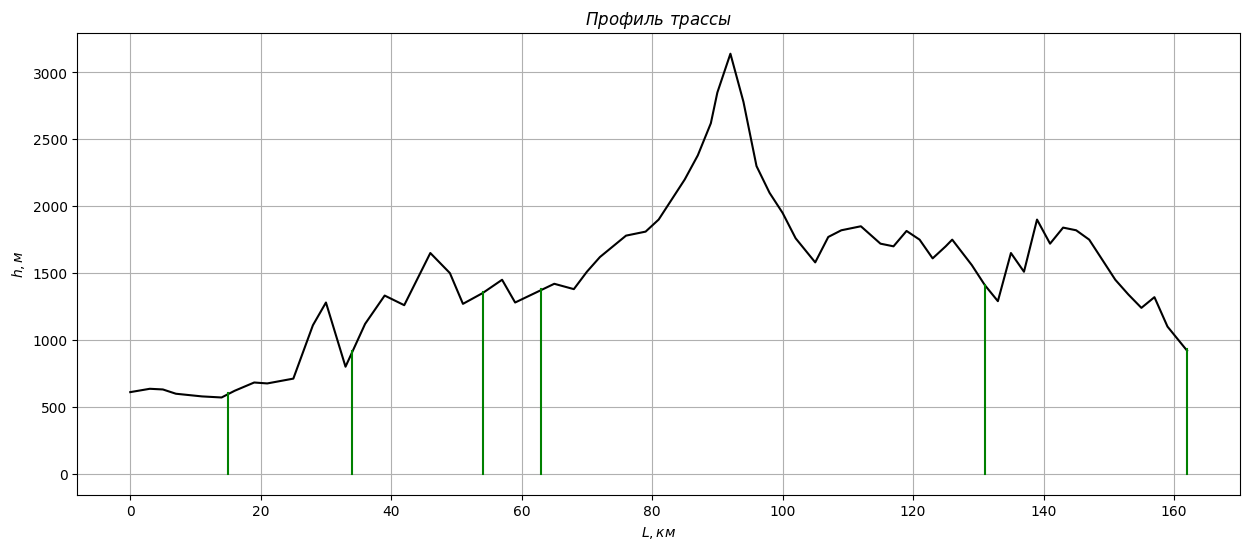

In [19]:
def h_plot():
    fig = plt.subplots(figsize=(15, 6))
    plt.plot(x, h, color = 'black')
    plt.plot(x_j1, h_j1, color = 'green')
    plt.plot(x_j2, h_j2, color = 'green')
    plt.plot(x_j3, h_j3, color = 'green')
    plt.plot(x_j4, h_j4, color = 'green')
    plt.plot(x_j5, h_j5, color = 'green')
    plt.plot(x_j6, h_j6, color = 'green')
    plt.xlabel(r'$L, км$')
    plt.ylabel(r'$h, м$')
    plt.title(r'$  Профиль \ трассы  $')
    plt.grid(True)
    plt.show()

h_plot()

### Распределения давления

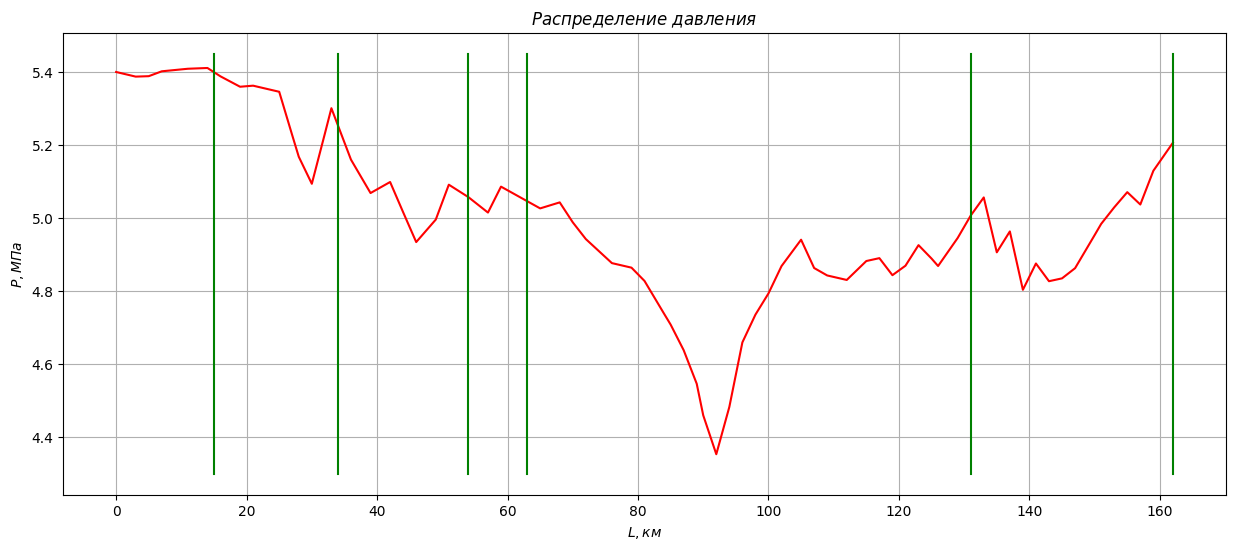

In [18]:
def P_plot():
    fig = plt.subplots(figsize=(15, 6))
    plt.plot(delta_x_list, P_list, color = 'red')
    plt.plot(x_j1, p_j1, color = 'green')
    plt.plot(x_j2, p_j2, color = 'green')
    plt.plot(x_j3, p_j3, color = 'green')
    plt.plot(x_j4, p_j4, color = 'green')
    plt.plot(x_j5, p_j5, color = 'green')
    plt.plot(x_j6, p_j6, color = 'green')
    plt.xlabel(r'$L, км$')
    plt.ylabel(r'$P, МПа$')
    plt.title(r'$  Распределение \ давления  $')
    plt.grid(True)
    plt.show()

P_plot()

### Распределение температуры

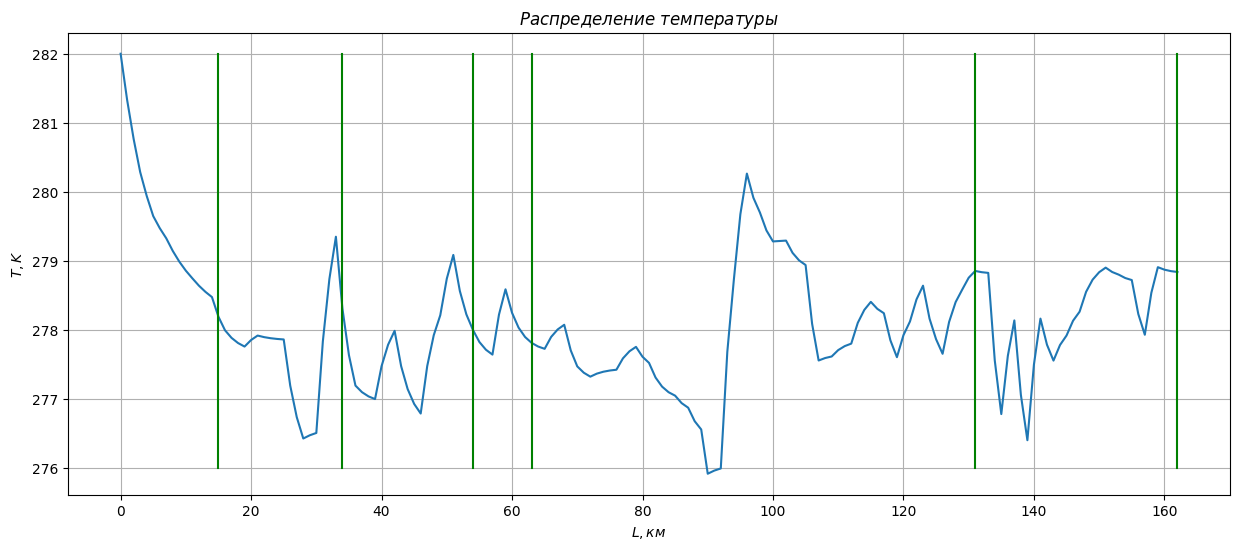

In [17]:
def T_plot():
    fig = plt.subplots(figsize=(15, 6))
    plt.plot(delta_x_list, T_list)
    plt.plot(x_j1, t_j1, color = 'green')
    plt.plot(x_j2, t_j2, color = 'green')
    plt.plot(x_j3, t_j3, color = 'green')
    plt.plot(x_j4, t_j4, color = 'green')
    plt.plot(x_j5, t_j5, color = 'green')
    plt.plot(x_j6, t_j6, color = 'green')
    plt.xlabel(r'$L, км$')
    plt.ylabel(r'$T, K$')
    plt.title(r'$  Распределение \ температуры  $')
    plt.grid(True)
    plt.show()

T_plot()

### Массовый расход

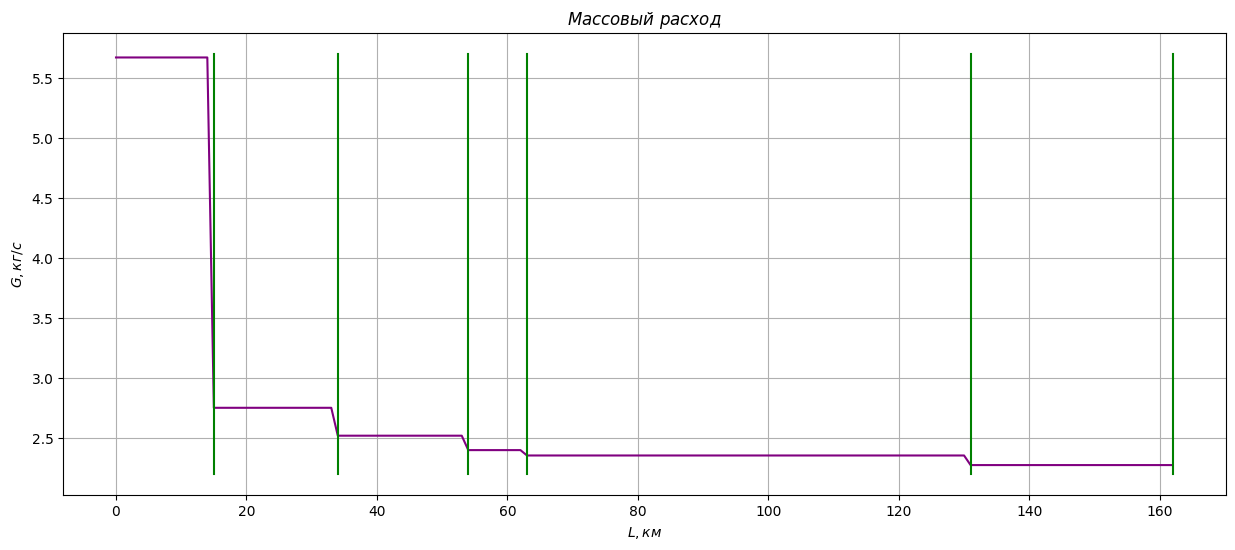

In [16]:
def G_plot():
    fig, ax = plt.subplots(figsize=(15, 6))  # Установите размер графика по вашему усмотрению
    ax.plot(delta_x_list, G_list_1, color='purple')
    ax.plot(x_j1, g_j1, color='green')
    ax.plot(x_j2, g_j2, color='green')
    ax.plot(x_j3, g_j3, color='green')
    ax.plot(x_j4, g_j4, color='green')
    ax.plot(x_j5, g_j5, color='green')
    ax.plot(x_j6, g_j6, color='green')
    ax.set_xlabel(r'$L, км$')
    ax.set_ylabel(r'$G, кг/с$')
    ax.set_title(r'$  Массовый \ расход  $')
    ax.grid(True)
    plt.show()

G_plot()